### WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

       # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kununurra
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | wuxi
Processing Record 4 of Set 1 | jiamusi
Processing Record 5 of Set 1 | sriramnagar
Processing Record 6 of Set 1 | tateyama
Processing Record 7 of Set 1 | nizhnyaya tavda
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | masina
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | malabar
Processing Record 13 of Set 1 | ciudad lazaro cardenas
Processing Record 14 of Set 1 | taro
Processing Record 15 of Set 1 | mil'kovo
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | baikunthpur
Processing Record 18 of Set 1 | jinchang
Processing Record 19 of Set 1 | vryburg
Processing Record 20 of Set 1 | alofi
Processing Record 21 of Set 1 | taiohae
City not found. Skipping...
Processing Record 22 of Set 1 | buba

Processing Record 38 of Set 4 | dudinka
Processing Record 39 of Set 4 | fortuna
Processing Record 40 of Set 4 | richards bay
Processing Record 41 of Set 4 | rongelap
Processing Record 42 of Set 4 | colonia
Processing Record 43 of Set 4 | sarkand
Processing Record 44 of Set 4 | murrells inlet
Processing Record 45 of Set 4 | port isabel
Processing Record 46 of Set 4 | east london
Processing Record 47 of Set 4 | remire-montjoly
Processing Record 48 of Set 4 | gawan
Processing Record 49 of Set 4 | fukuecho
Processing Record 0 of Set 5 | gray
Processing Record 1 of Set 5 | weno
Processing Record 2 of Set 5 | muli
Processing Record 3 of Set 5 | peace river
Processing Record 4 of Set 5 | nova vicosa
Processing Record 5 of Set 5 | gornozavodsk
Processing Record 6 of Set 5 | cootamundra
Processing Record 7 of Set 5 | necochea
Processing Record 8 of Set 5 | quellon
Processing Record 9 of Set 5 | illizi
Processing Record 10 of Set 5 | port alfred
Processing Record 11 of Set 5 | lagoa
Processing R

Processing Record 32 of Set 8 | taulaga
Processing Record 33 of Set 8 | launceston
Processing Record 34 of Set 8 | idanre
Processing Record 35 of Set 8 | jalor
Processing Record 36 of Set 8 | akureyri
Processing Record 37 of Set 8 | bechar
Processing Record 38 of Set 8 | port huron
Processing Record 39 of Set 8 | baruun-urt
Processing Record 40 of Set 8 | pingliang
Processing Record 41 of Set 8 | gaspe
Processing Record 42 of Set 8 | manggar
Processing Record 43 of Set 8 | buka
Processing Record 44 of Set 8 | grand gaube
Processing Record 45 of Set 8 | munteni
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | lobujya
Processing Record 48 of Set 8 | utica
Processing Record 49 of Set 8 | hobyo
Processing Record 0 of Set 9 | longyearbyen
Processing Record 1 of Set 9 | la serena
Processing Record 2 of Set 9 | lodja
Processing Record 3 of Set 9 | portland
Processing Record 4 of Set 9 | fort stockton
Processing Record 5 of Set 9 | prince albert
Processing Record 6 of Set

Processing Record 20 of Set 12 | ijuw
City not found. Skipping...
Processing Record 21 of Set 12 | howrah
Processing Record 22 of Set 12 | mount pearl
Processing Record 23 of Set 12 | selfoss
Processing Record 24 of Set 12 | inirida
Processing Record 25 of Set 12 | tengrela
Processing Record 26 of Set 12 | novopskov
Processing Record 27 of Set 12 | emporia
Processing Record 28 of Set 12 | harstad
Processing Record 29 of Set 12 | kone
Processing Record 30 of Set 12 | gobabis
Processing Record 31 of Set 12 | mocimboa
Processing Record 32 of Set 12 | sombrio
Processing Record 33 of Set 12 | kiffa
Processing Record 34 of Set 12 | shangri-la
City not found. Skipping...
Processing Record 35 of Set 12 | darab
Processing Record 36 of Set 12 | trat
Processing Record 37 of Set 12 | westport
Processing Record 38 of Set 12 | mutuali
Processing Record 39 of Set 12 | sao jose da coroa grande
Processing Record 40 of Set 12 | keflavik
Processing Record 41 of Set 12 | malango
Processing Record 42 of Se

In [35]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kununurra,-15.7667,128.7333,18.99,82,35,2.57,AU,1681819171
1,grytviken,-54.2811,-36.5092,2.83,87,84,1.38,GS,1681819157
2,wuxi,31.5689,120.2886,20.17,82,100,2.11,CN,1681819214
3,jiamusi,46.8333,130.3500,7.09,76,100,2.50,CN,1681819314
4,sriramnagar,17.2665,78.2554,37.29,18,40,5.14,IN,1681819316


In [36]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [37]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.sample(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
167,kyzyl-mazhalyk,51.1333,90.6000,-0.09,30,82,4.91,RU,1681819350
477,revda,56.8010,59.9303,8.30,38,88,3.73,RU,1681819415
5,tateyama,34.9833,139.8667,17.13,72,97,10.51,JP,1681819316
269,zouerate,22.7187,-12.4521,24.89,26,2,5.59,MR,1681819370
335,jiwani,25.0500,61.7417,26.59,61,85,3.26,PK,1681819386
182,sarkand,45.4100,79.9186,2.88,73,100,1.03,KZ,1681819353
327,dibba al-hisn,25.6196,56.2729,29.10,22,85,5.16,AE,1681819384
474,dhalie,13.6957,44.7314,26.24,37,16,5.06,YE,1681819414
12,ciudad lazaro cardenas,17.9583,-102.2000,22.66,89,32,1.70,MX,1681819318


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

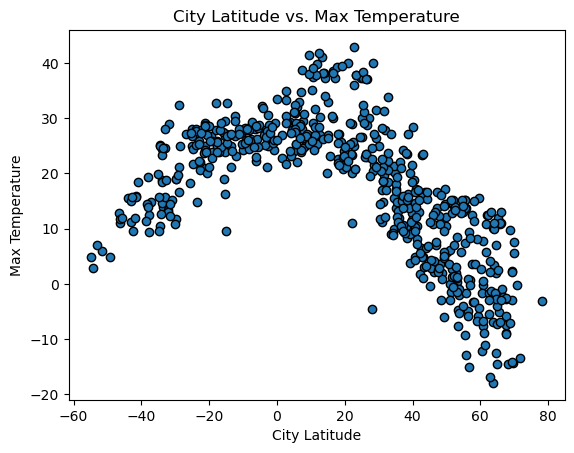

In [38]:
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black')

plt.title(f'City Latitude vs. Max Temperature')
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

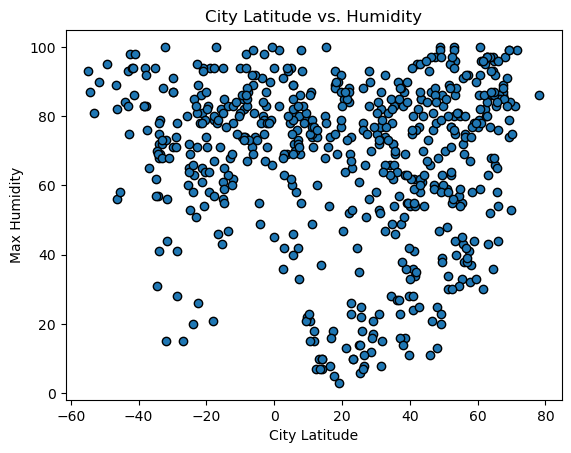

In [39]:
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')

plt.title(f'City Latitude vs. Humidity')
plt.xlabel('City Latitude')
plt.ylabel('Max Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

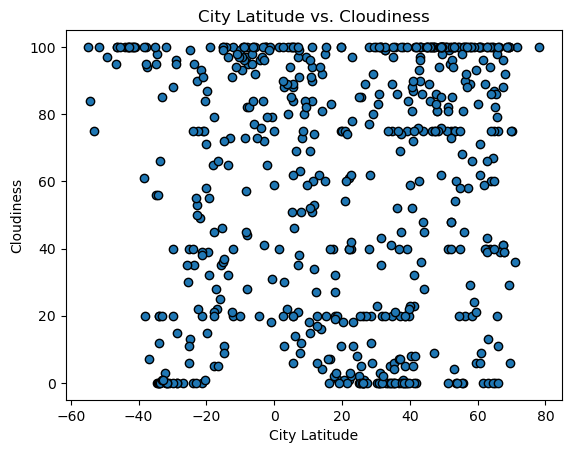

In [40]:
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black')

plt.title(f'City Latitude vs. Cloudiness')
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

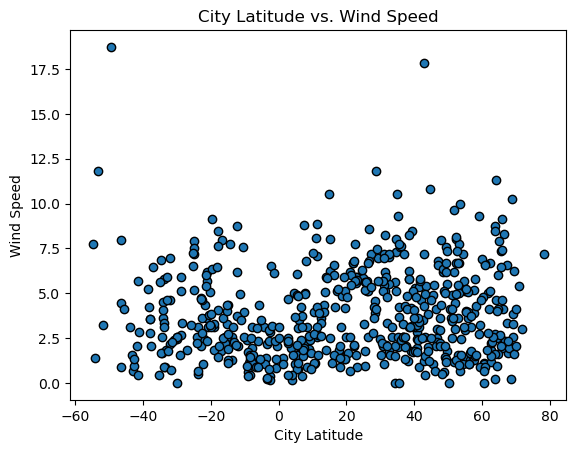

In [41]:
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')

plt.title(f'City Latitude vs. Wind Speed')
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The R2 value is 0.3345935339164702
-0.22032466315476873 21.526794598641185 -0.578440605348959 1.315809251220589e-54 0.012737651673892179


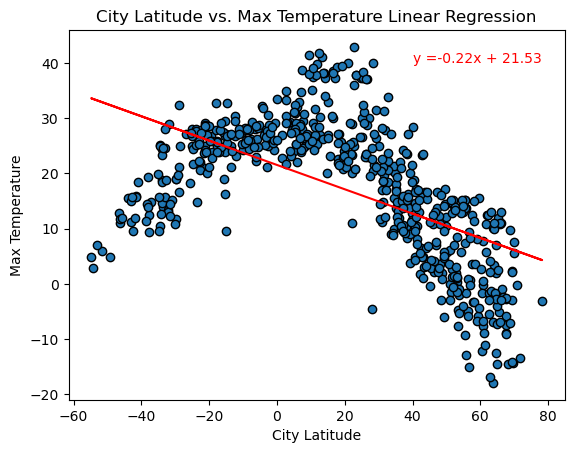

In [42]:
# Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_data_df['Lat'], city_data_df['Max Temp'])

regress_values = slope*city_data_df['Lat'] + intercept

line_eq = f'y ={round(slope, 2)}x + {round(intercept, 2)}'

plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black')
plt.title(f'City Latitude vs. Max Temperature Linear Regression')
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature')
plt.plot(city_data_df['Lat'], regress_values, color='red')

plt.annotate(line_eq, (40,40), color='red')

print(f'The R2 value is {rvalue**2}')
print(slope, intercept, rvalue, pvalue, stderr)
plt.show()

The R2 value is 0.3345935339164702


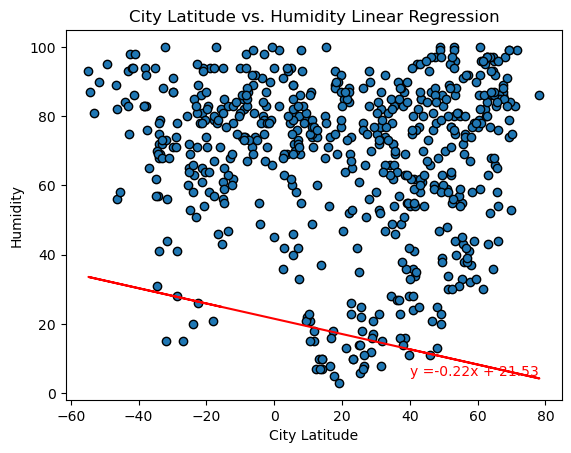

In [43]:
### (slope, intercept, rvalue, pvalue, stderr) = linregress(city_data_df['Lat'], city_data_df['Humidity'])

regress_values = slope*city_data_df['Lat'] + intercept

line_eq = f'y ={round(slope, 2)}x + {round(intercept, 2)}'

plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')
plt.title(f'City Latitude vs. Humidity Linear Regression')
plt.xlabel('City Latitude')
plt.ylabel('Humidity')
plt.plot(city_data_df['Lat'], regress_values, color='red')

plt.annotate(line_eq, (40,5), color='red')

print(f'The R2 value is {rvalue**2}')

plt.show()

The R2 value is 0.003410448929590816


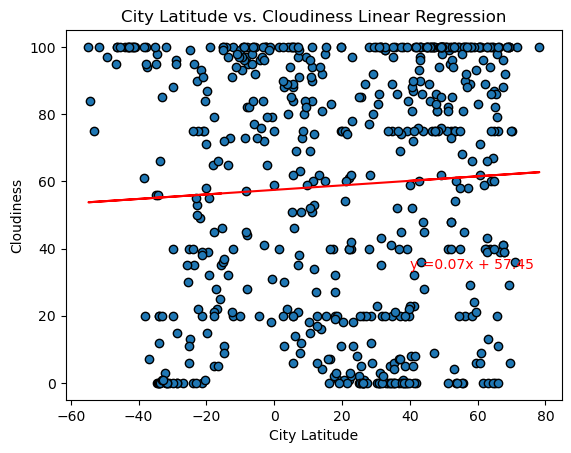

In [44]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_data_df['Lat'], city_data_df['Cloudiness'])

regress_values = slope*city_data_df['Lat'] + intercept

line_eq = f'y ={round(slope, 2)}x + {round(intercept, 2)}'

plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black')
plt.title(f'City Latitude vs. Cloudiness Linear Regression')
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')
plt.plot(city_data_df['Lat'], regress_values, color='red')

plt.annotate(line_eq, (40,34), color='red')

print(f'The R2 value is {rvalue**2}')

plt.show()

The R2 value is 0.007713371077210092


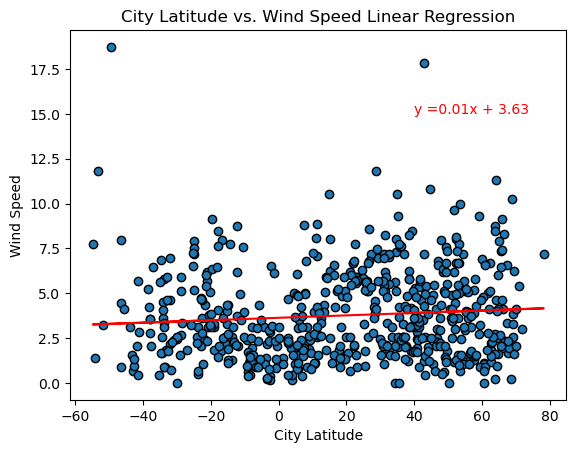

In [45]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_data_df['Lat'], city_data_df['Wind Speed'])

regress_values = slope*city_data_df['Lat'] + intercept

line_eq = f'y ={round(slope, 2)}x + {round(intercept, 2)}'

plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')
plt.title(f'City Latitude vs. Wind Speed Linear Regression')
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed')
plt.plot(city_data_df['Lat'], regress_values, color='red')

plt.annotate(line_eq, (40,15), color='red')

print(f'The R2 value is {rvalue**2}')

plt.show()

In [46]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.sample(25)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
369,akureyri,65.6835,-18.0878,10.96,58,20,2.06,IS,1681819209
579,fismes,49.3077,3.6861,14.13,58,62,6.67,FR,1681819435
441,catio,11.2833,-15.2500,31.64,49,90,4.26,GW,1681819407
504,arkhangel'sk,64.5401,40.5433,7.06,36,0,4.00,RU,1681819420
218,colotlan,22.1000,-103.2667,10.97,52,1,2.09,MX,1681819361
240,banda aceh,5.5577,95.3222,28.03,79,84,1.58,ID,1681819365
547,inirida,3.8653,-67.9239,23.98,94,89,0.44,CO,1681819426
342,buurhakaba,2.8026,44.0781,33.33,42,88,2.33,SO,1681819387
274,eastham,41.8301,-69.9739,13.01,76,0,5.66,US,1681819371


In [47]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df =  city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.sample(25)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
510,muncar,-8.4333,114.3333,26.03,86,45,1.45,ID,1681819421
297,punta arenas,-53.1500,-70.9167,7.06,81,75,11.83,CL,1681819077
38,margaret river,-33.9500,115.0667,14.56,68,0,5.79,AU,1681819322
414,new norfolk,-42.7826,147.0587,15.72,75,100,1.34,AU,1681819401
99,parkes,-33.1333,148.1833,15.75,72,85,1.82,AU,1681819336
256,villa huidobro,-34.8383,-64.5869,9.55,57,56,5.63,AR,1681819368
594,nelson bay,-32.7167,152.1500,18.89,88,1,1.79,AU,1681819437
67,nuku'alofa,-21.1333,-175.2000,24.19,94,75,5.66,TO,1681819329
237,opuwo,-18.0607,13.8400,32.73,21,65,6.46,NaN,1681819364


###  Temperature vs. Latitude Linear Regression Plot

The R2 value is 0.6988472747924829
-0.5715778835998162 36.273632006487965 -0.8359708576215339 5.431218377216212e-111 0.01835225926559646


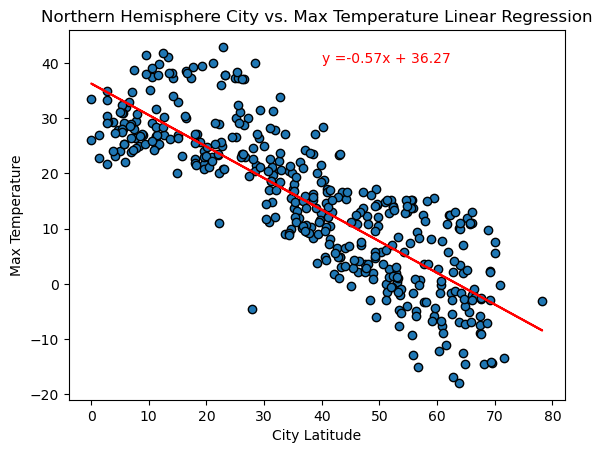

In [48]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

regress_values = slope*northern_hemi_df['Lat'] + intercept

line_eq = f'y ={round(slope, 2)}x + {round(intercept, 2)}'

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], edgecolors='black')
plt.title('Northern Hemisphere City vs. Max Temperature Linear Regression')
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature')
plt.plot(northern_hemi_df['Lat'], regress_values, color='red')

plt.annotate(line_eq, (40,40), color='red')

print(f'The R2 value is {rvalue**2}')
print(slope, intercept, rvalue, pvalue, stderr)

plt.show()

The R2 value is 0.5676854102741916
0.3701411555626446 30.459662166418077 0.7534490097373489 1.0799116302505252e-33 0.024417119679082697


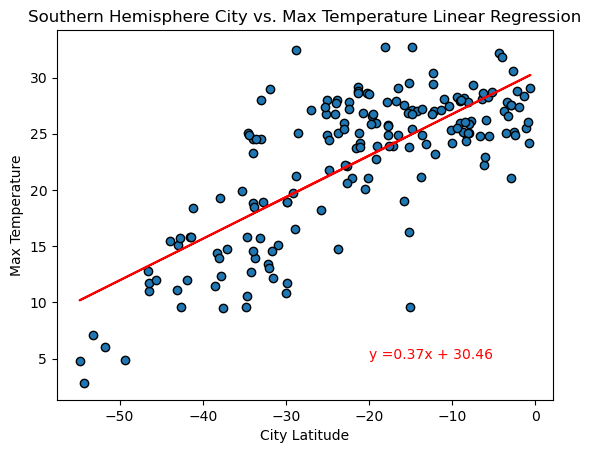

In [49]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

regress_values = slope*southern_hemi_df['Lat'] + intercept

line_eq = f'y ={round(slope, 2)}x + {round(intercept, 2)}'

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], edgecolors='black')
plt.title('Southern Hemisphere City vs. Max Temperature Linear Regression')
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature')
plt.plot(southern_hemi_df['Lat'], regress_values, color='red')

plt.annotate(line_eq, (-20, 5), color='red')

print(f'The R2 value is {rvalue**2}')
print(slope, intercept, rvalue, pvalue, stderr)

plt.show()

**Discussion about the linear relationship:** \
Summary:
When observing the initial regression analysis between city latitude and max temperature we can clearly see a pattern in the data, as there is a clear data curve, with the principal access of that curve around the 0 degress latitude. As you move closer to the equator (0° latitude), the maximum temperature generally increases. Conversely, as you move closer to the poles (90° latitude), the maximum temperature generally decreases. However, when employing a linear analysis on this kind of data distribution, we lose precision in establishing the linear correlation between our two variables. With a dataset displaying a pattern such as this, we can gain more insight into the relationship between our two variables by breaking out the data along the approximate principal axis or centre of the data curve, which in this case was 0 degrees latitude. In doing so, we can clearly see the linear relationship between latitude and max temperature.

Note: The linear regression analysis for data points in the Northern Hemisphere suggest that latitude and temperature are strongly negatively correlated, with a 3 significant relationship. This means that as latitude increases in the Northern Hemisphere, temperature tends to decrease. This correlation is somewhat stronger in this sample set than the correlation found in the Southern Hemisphere. 


**Northern Hemisphere Details:** \
Slope (-0.5715778835998162): This value represents the rate at which temperature changes with respect to a unit change in latitude for data points in the Northern Hemisphere. In this case, a one-degree increase in latitude in the Northern Hemisphere is associated with a 0.57-degree decrease in temperature.

Intercept (36.273632006487965): This value represents the expected temperature when latitude is zero in the Northern Hemisphere. 

rvalue (-0.8359708576215339): This value represents the strength and direction of the linear relationship between latitude and temperature for data points in the Northern Hemisphere. In this case, an rvalue of -0.84 indicates a strong negative correlation between latitude and temperature in the Northern Hemisphere, meaning that as latitude increases in the Northern Hemisphere, temperature tends to decrease.

pvalue (5.431218377216212e-111): This value represents the probability of observing a correlation as strong as the one found in the sample data by chance alone, assuming that there is no true correlation in the population of Northern Hemisphere data points. A p-value less than 0.05 is typically considered statistically significant, which means that we can reject the null hypothesis that there is no true correlation in the population of Northern Hemisphere data points.

stderr (0.01835225926559646): This value represents the standard error of the slope estimate for data points in the Northern Hemisphere. It measures the variability of the slope estimate across different samples. A smaller standard error indicates a more precise estimate of the slope for data points in the Northern Hemisphere.

**Southern Hemisphere Details:** \
Slope (0.3701411555626446 ): This value represents the rate at which temperature changes with respect to a unit change in latitude. In this case, a one-degree increase in latitude is associated with a 0.37-degree increase in temperature.

Intercept (30.459662166418077): This value represents the expected temperature when latitude is zero.

rvalue (0.7534490097373489): This value represents the strength and direction of the linear relationship between latitude and temperature. The closer this value is to 1 or -1, the stronger the relationship. In this case, an rvalue of 0.75 indicates a moderate to strong positive correlation between latitude and temperature, meaning that as latitude increases, temperature also tends to increase.

pvalue (1.0799116302505252e-33): This value represents the probability of observing a correlation as strong as the one found in the sample data by chance alone, assuming that there is no true correlation in the population. A p-value less than 0.05 is typically considered statistically significant, which means that we can reject the null hypothesis that there is no true correlation in the population.

stderr (0.024417119679082697): This value represents the standard error of the slope estimate. It measures the variability of the slope estimate across different samples. A smaller standard error indicates a more precise estimate of the slope.

### Humidity vs. Latitude Linear Regression Plot

The R2 value is 0.03565323379453201
0.24420439755599158 55.63154721080309 0.18882063921757072 9.892431054985268e-05 0.0621201492000367


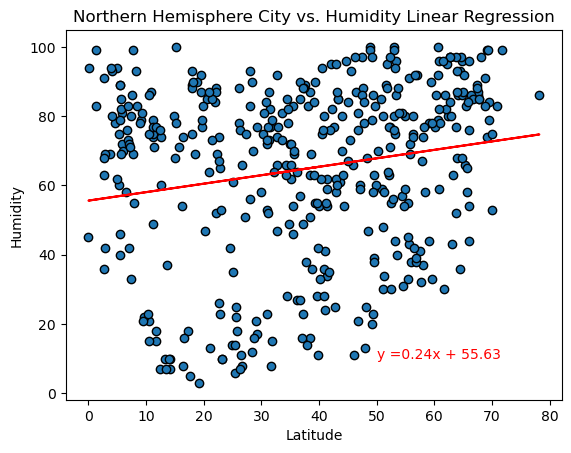

In [50]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

regress_values = slope*northern_hemi_df['Lat'] + intercept

line_eq = f'y ={round(slope, 2)}x + {round(intercept, 2)}'

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], edgecolors='black')
plt.title('Northern Hemisphere City vs. Humidity Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.plot(northern_hemi_df['Lat'], regress_values, color='red')

plt.annotate(line_eq, (50,10), color='red')

print(f'The R2 value is {rvalue**2}')
print(slope, intercept, rvalue, pvalue, stderr)

plt.show()

The R2 value is 0.0010436769147141153
0.04135600834414299 75.03848858774165 0.032305988836655586 0.6694744249923716 0.09671855542972721


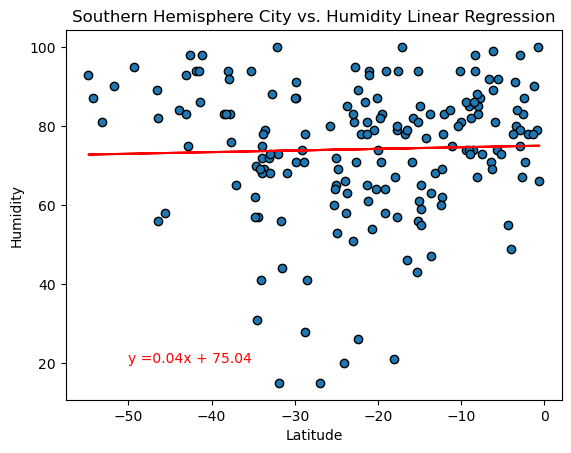

In [51]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

regress_values = slope*southern_hemi_df['Lat'] + intercept

line_eq = f'y ={round(slope, 2)}x + {round(intercept, 2)}'

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], edgecolors='black')
plt.title('Southern Hemisphere City vs. Humidity Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.plot(southern_hemi_df['Lat'], regress_values, color='red')

plt.annotate(line_eq, (-50,20), color='red')

print(f'The R2 value is {rvalue**2}')
print(slope, intercept, rvalue, pvalue, stderr)

plt.show()

**Discussion about the linear relationship:** \
The relationship between latitude and humidity is not as straightforward as the relationship between latitude and maximum temperature. Although I lack a great understanding of overall influences on humidity, it could be due to a variety of localized factors such as temperature, air pressure, local geography, density of flora, and proximity to bodies of water. It appears that there is a trend towards higher humidity levels near the equator, but the overall relationship between latitude and humidity is far less linear, a certainly less correlated than latitude and maximum temperature. The regression analysis for data points in the Northern Hemisphere suggest that there is a weak positive correlation between humidity and latitude, meaning that as latitude increases in the Northern Hemisphere, humidity tends to increase slightly. However, the correlation is not very strong, and there is a relatively large standard error, indicating that the estimate of the slope may not be very precise.


**Northern Hemisphere:** \
Slope (0.24420439755599158): This value represents the rate at which humidity changes with respect to a unit change in latitude for data points in the Northern Hemisphere. In this case, a one-degree increase in latitude in the Northern Hemisphere is associated with a 0.24% increase in humidity.

Intercept (55.63154721080309): This value represents the expected humidity when latitude is zero in the Northern Hemisphere, or the expected humidity close to the equator. 

rvalue (0.18882063921757072): This value represents the strength and direction of the linear relationship between humidity and latitude for data points in the Northern Hemisphere. In this case, an rvalue of 0.19 indicates a weak positive correlation between humidity and latitude in the Northern Hemisphere.

pvalue (9.892431054985268e-05): This value represents the probability of observing a correlation as strong as the one found in the sample data by chance alone, assuming that there is no true correlation in the population of Northern Hemisphere data points. A p-value less than 0.05 is typically considered statistically significant, which means that we can reject the null hypothesis that there is no true correlation in the population of Northern Hemisphere data points.

stderr (0.0621201492000367): This value represents the standard error of the slope estimate for data points in the Northern Hemisphere. It measures the variability of the slope estimate across different samples.

**Southern Hemisphere:** \
Slope (0.04135600834414299): This value represents the rate at which humidity changes with respect to a unit change in latitude for data points in the Southern Hemisphere. In this case, a one-degree increase in latitude in the Southern Hemisphere is associated with a 0.04 increase in humidity.

Intercept (75.03848858774165): This value represents the expected humidity when latitude is zero in the Southern Hemisphere.

rvalue (0.032305988836655586): This value represents the strength and direction of the linear relationship between humidity and latitude for data points in the Southern Hemisphere. In this case, an rvalue of 0.03 indicates a weak positive correlation between humidity and latitude in the Southern Hemisphere.

pvalue (0.6694744249923716): This value represents the probability of observing a correlation as strong as the one found in the sample data by chance alone, assuming that there is no true correlation in the population of Southern Hemisphere data points. A p-value greater than 0.05 indicates that the observed correlation is not statistically significant, and we fail to reject the null hypothesis that there is no true correlation in the population of Southern Hemisphere data points.

stderr (0.09671855542972721): This value represents the standard error of the slope estimate for data points in the Southern Hemisphere. It measures the variability of the slope estimate across different samples.


### Cloudiness vs. Latitude Linear Regression Plot

The R2 value is 0.027674095804969826
0.3168876705103132 46.227940469843254 0.1663553299566017 0.0006193634966986398 0.09187268503891657


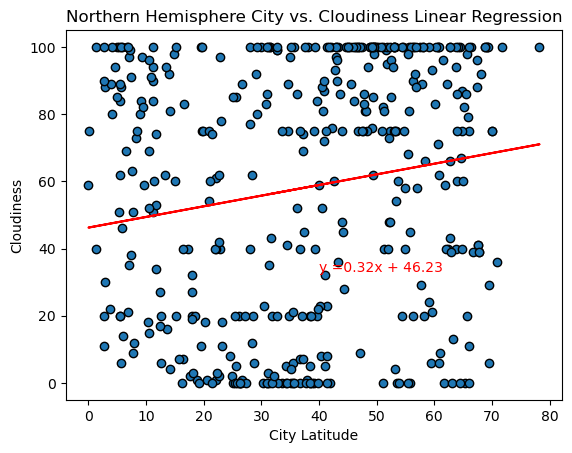

In [52]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

regress_values = slope*northern_hemi_df['Lat'] + intercept

line_eq = f'y ={round(slope, 2)}x + {round(intercept, 2)}'

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], edgecolors='black')
plt.title('Northern Hemisphere City vs. Cloudiness Linear Regression')
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')
plt.plot(northern_hemi_df['Lat'], regress_values, color='red')

plt.annotate(line_eq, (40,33), color='red')

print(f'The R2 value is {rvalue**2}')
print(slope, intercept, rvalue, pvalue, stderr)

plt.show()

The R2 value is 0.007670765264651402
0.24507450774661263 65.67382042515975 0.08758290509369623 0.2463795692549463 0.21071121981114788


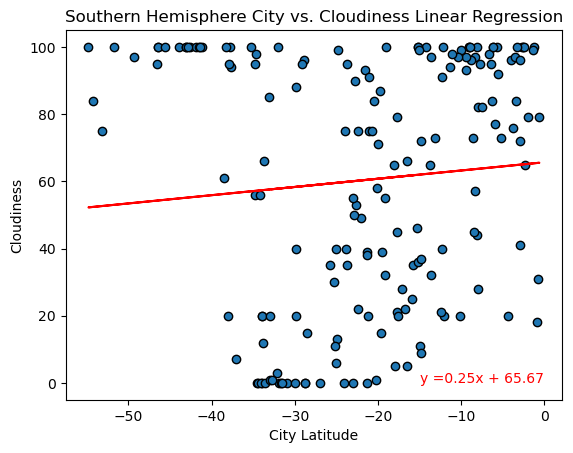

In [53]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

regress_values = slope*southern_hemi_df['Lat'] + intercept

line_eq = f'y ={round(slope, 2)}x + {round(intercept, 2)}'

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], edgecolors='black')
plt.title('Southern Hemisphere City vs. Cloudiness Linear Regression')
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')
plt.plot(southern_hemi_df['Lat'], regress_values, color='red')

plt.annotate(line_eq, (-15, 0), color='red')

print(f'The R2 value is {rvalue**2}')
print(slope, intercept, rvalue, pvalue, stderr)

plt.show()

**Discussion about the linear relationship:** \
There appears to be a weak correlation cloudiness and latitude. It seems that in general, areas closer to the equator tend to have less cloud cover than areas closer to the poles. There are, however, many outlying datapoints that challenge this trend, likely due more localized factors, like what we observed with humidity, including topography, proximity to bodies of water, and prevailing wind patterns.

**Northern Hemisphere:** \
The positive slope of 0.316 indicates a weak positive relationship between latitude and cloudiness in the northern hemisphere, meaning that as you move towards the pole, cloudiness tends to increase slightly. The intercept of 46.23 indicates that at the equator, the predicted cloudiness is around 46.23. The rvalue of 0.166 suggests a weak positive correlation, which is further supported by the pvalue of 0.0006, indicating that the correlation is statistically significant. The standard error of 0.091 indicates that the regression line may not perfectly fit the data, but the effect size is still significant.

**Southern Hemisphere:** \
The positive slope of 0.245 indicates a weak positive relationship between latitude and cloudiness in the southern hemisphere, but the relationship is weaker than in the northern hemisphere. This means that as you move towards the pole, cloudiness tends to increase slightly in the southern hemisphere as well, but the effect size is weaker. The intercept of 65.67 suggests that at the equator, the predicted cloudiness is around 65.67. The rvalue of 0.088 indicates a very weak positive correlation, which is further supported by the pvalue of 0.246, indicating that the correlation is not statistically significant. The standard error of 0.210 indicates that the regression line may not be a good fit for the data, which may contribute to the lack of statistical significance.

### Wind Speed vs. Latitude Linear Regression Plot

The R2 value is 0.005210377149533169
0.009105700125594342 3.5986925058484704 0.07218294223383506 0.1397216460455081 0.006153982341647534


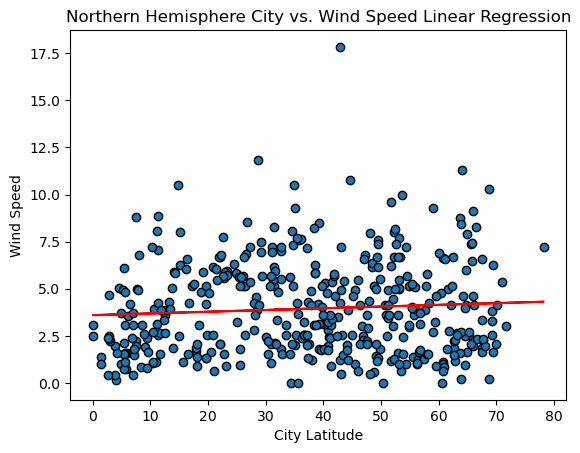

In [54]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

regress_values = slope*northern_hemi_df['Lat'] + intercept

line_eq = f'y ={round(slope, 2)}x + {round(intercept, 2)}'

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], edgecolors='black')
plt.title('Northern Hemisphere City vs. Wind Speed Linear Regression')
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed')
plt.plot(northern_hemi_df['Lat'], regress_values, color='red')

plt.annotate(line_eq, (40,33), color='red')

print(f'The R2 value is {rvalue**2}')
print(slope, intercept, rvalue, pvalue, stderr)

plt.show()

The R2 value is 0.07243574874873684
-0.05042489270438644 2.271414658222091 -0.2691389023324886 0.00029192540923902424 0.013640223385217058


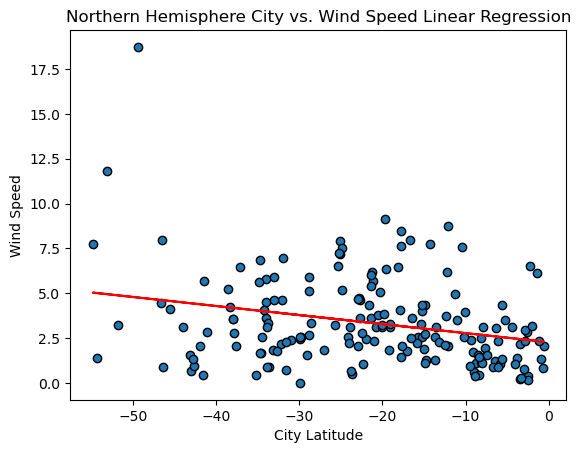

In [55]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

regress_values = slope*southern_hemi_df['Lat'] + intercept

line_eq = f'y ={round(slope, 2)}x + {round(intercept, 2)}'

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], edgecolors='black')
plt.title('Northern Hemisphere City vs. Wind Speed Linear Regression')
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed')
plt.plot(southern_hemi_df['Lat'], regress_values, color='red')

plt.annotate(line_eq, (40,33), color='red')

print(f'The R2 value is {rvalue**2}')
print(slope, intercept, rvalue, pvalue, stderr)

plt.show()

**Discussion about the linear relationship:** \
From the available data we can infer that in general winds tend to be stronger at higher latitudes than at lower latitudes, and that there is a slight correlation between our two variables. This correlation is weaker that what we observed between max temperature and latitude but is nonetheless present. According to the World Atlas, the correlation observed above is primarily due to the way the sun's energy is distributed across the Earth's surface. The sun's rays strike the equator directly, delivering more energy per unit area, thus leading to higher temperatures. As you move away from the equator, the sun's rays strike at an angle, spreading out over a larger surface area and delivering less energy per unit area, resulting in cooler temperatures. From what we've been able observe here, it becomes clear that the effect of the suns rays have a more powerful effect on temperature, with the other phenomena analyzed either less affected by the suns rays, or more affected by local conditions.

**Northern Hemisphere:** \
The positive slope of 0.009 indicates a very weak positive relationship between latitude and wind speed in the northern hemisphere, meaning that as you move towards the pole, wind speed tends to increase very slightly. The intercept of 3.60 suggests that at the equator, the predicted wind speed is around 3.60. The rvalue of 0.072 indicates a very weak positive correlation, which is further supported by the pvalue of 0.140, indicating that the correlation is not statistically significant. The standard error of 0.006 indicates that the regression line is a good fit for the data, but the effect size is very weak.

**Southern Hemisphere:** \
The negative slope of -0.050 indicates a weak negative relationship between latitude and wind speed in the southern hemisphere, meaning that as you move towards the pole, wind speed tends to decrease slightly. The intercept of 2.27 suggests that at the equator, the predicted wind speed is around 2.27. The rvalue of -0.269 indicates a weak negative correlation, which is further supported by the pvalue of 0.0003, indicating that the correlation is statistically significant. The standard error of 0.014 indicates that the regression line may not perfectly fit the data, but the effect size is still significant.


**Note:** \
After writing my initial summaries, I passed the results of each of my regression values into ChatGPT for additional analysis. The "Northern Hemisphere" and "Southern Hemisphere" sections of my analysis were produced in part by ChatGPT. 

**References:** \
https://www.worldatlas.com/articles/what-is-the-effect-of-latitude-on-temperature.html